* Add clustering of the artists and the songs, PCA so we can visualize
* Hypothesis testing on audio features between clusters


In [1]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)

## Setup

In [2]:
df = pd.read_csv("TopCharts_complete.csv")
df.head()

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),"1,371,493",0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,0.123,0.175,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,"1,180,074",0.928,0.481,9.0,-9.350,0.0,0.2870,0.105,0.000000,0.176,0.613,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,"1,064,351",0.679,0.587,7.0,-7.015,1.0,0.2760,0.141,0.000006,0.137,0.486,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,"1,010,492",0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,0.111,0.661,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,"874,289",0.794,0.632,0.0,-6.163,1.0,0.0649,0.142,0.000000,0.128,0.355,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0


In [3]:
#couldn't retrieve audio features for these songs
df.loc[df.uri.isna(), :] 

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
42,43,2017-01-01,Major Lazer,Cold Water (feat. Justin Bieber & MØ),"342,437",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,49,2017-01-01,Starley,Call On Me - Ryan Riback Extended Remix,"313,819",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,52,2017-01-01,Alessia Cara,"How Far I'll Go - From ""Moana""","305,401",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,174,2017-01-01,Major Lazer,Light It Up (feat. Nyla & Fuse ODG) - Remix,"155,772",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,179,2017-01-01,BobMcFerrin,Don't Worry Be Happy,"151,217",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238712,129,2020-04-11,GabBarrett,I Hope,"251,380",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238744,161,2020-04-11,BaKeem,ORANGE SODA,"218,865",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238769,186,2020-04-11,Kygo,I'll Wait,"204,501",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238913,130,2020-04-12,GabBarrett,I Hope,"211,929",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#drop songs with missing features from dataset
df = df.dropna(subset = ["uri"])
df.isna().any()

rank                False
date                False
artist              False
title               False
streams             False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
uri                 False
duration_ms         False
time_signature      False
dtype: bool

In [7]:
#song audio features don't change from day to day, only need one instance of each song; drop duplicates
unique_df = df.drop_duplicates(subset = ['artist', 'title']).reset_index(drop = True)

In [8]:
unique_df

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),"1,371,493",0.927,0.665,11.0,-5.313,1.0,0.2440,0.06100,0.000000,0.123,0.175,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,"1,180,074",0.928,0.481,9.0,-9.350,0.0,0.2870,0.10500,0.000000,0.176,0.613,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,"1,064,351",0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.137,0.486,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,"1,010,492",0.748,0.524,8.0,-5.599,1.0,0.0338,0.41400,0.000000,0.111,0.661,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,"874,289",0.794,0.632,0.0,-6.163,1.0,0.0649,0.14200,0.000000,0.128,0.355,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,178,2020-04-10,The Strokes,At The Door,"215,098",0.439,0.323,10.0,-6.764,1.0,0.0323,0.85800,0.009210,0.146,0.358,116.743,spotify:track:7lu6YLrlB1MU7HW8DJSuPa,310373.0,4.0
5009,184,2020-04-10,Gorillaz,Aries (feat. Peter Hook and Georgia),"211,580",0.611,0.667,2.0,-7.801,1.0,0.0342,0.01750,0.084400,0.241,0.793,119.996,spotify:track:2haIfONRw1Bhi2zSp67MYU,253333.0,4.0
5010,188,2020-04-10,The Strokes,Why Are Sundays So Depressing,"210,216",0.579,0.714,0.0,-4.455,1.0,0.0347,0.00258,0.026900,0.111,0.300,109.974,spotify:track:1aOxOpH4AkGAd8OMrKjyNY,275667.0,4.0
5011,189,2020-04-10,Tory Lanez,Adidas,"210,116",0.692,0.782,5.0,-7.316,0.0,0.2980,0.15500,0.000000,0.133,0.767,94.535,spotify:track:1ptXPpqYdJNYu4g7YEZ303,205032.0,4.0


In [9]:
#cluster only on continuous features
cluster_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo']

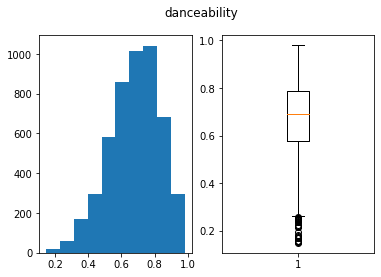

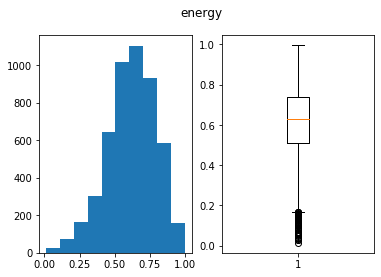

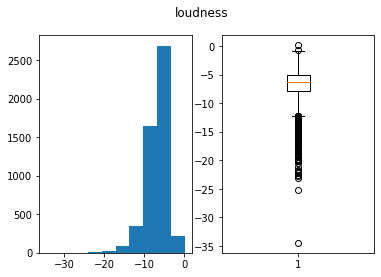

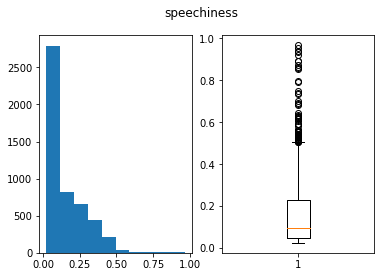

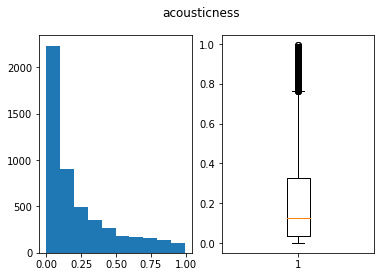

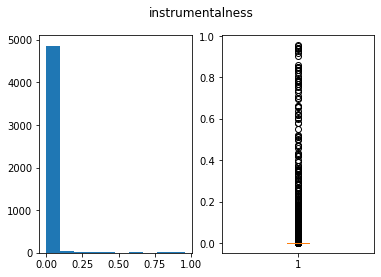

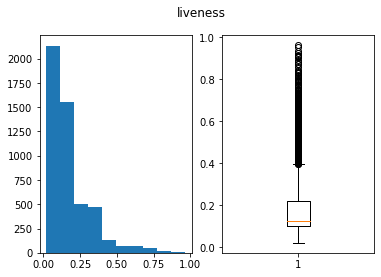

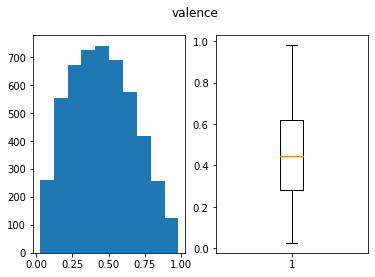

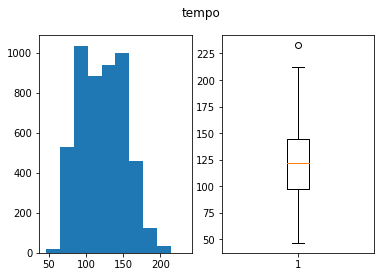

In [10]:
for c in cluster_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.hist(unique_df[c])
    ax2.boxplot(unique_df[c])
    fig.suptitle(c)
    plt.show()

In [13]:
print(unique_df.instrumentalness.describe())
#vast majority of values for instrumentalness at 0; non-discriminatory feature, can drop
unique_df.drop(columns = 'instrumentalness', inplace = True)
cluster_cols.remove('instrumentalness')

count    5013.000000
mean        0.014095
std         0.084513
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000027
max         0.956000
Name: instrumentalness, dtype: float64


## Transform + scale data

In [14]:
from scipy.stats import boxcox
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

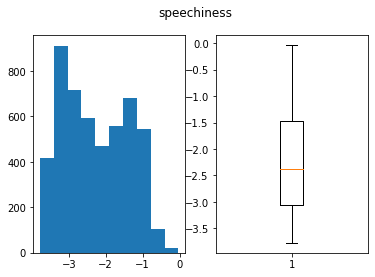

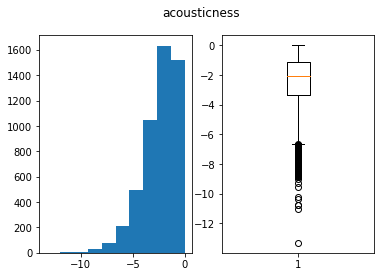

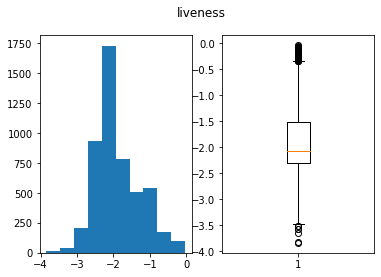

In [16]:
for c in ['speechiness', 'acousticness', 'liveness']:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.hist(np.log(unique_df[c]))
    ax2.boxplot(np.log(unique_df[c]))
    fig.suptitle(c)
    plt.show()

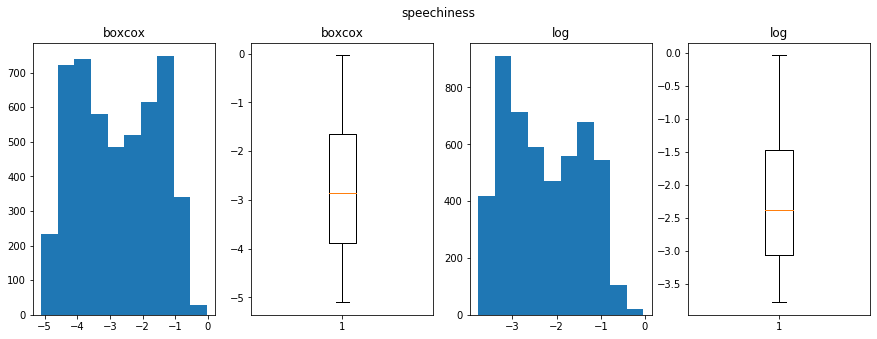

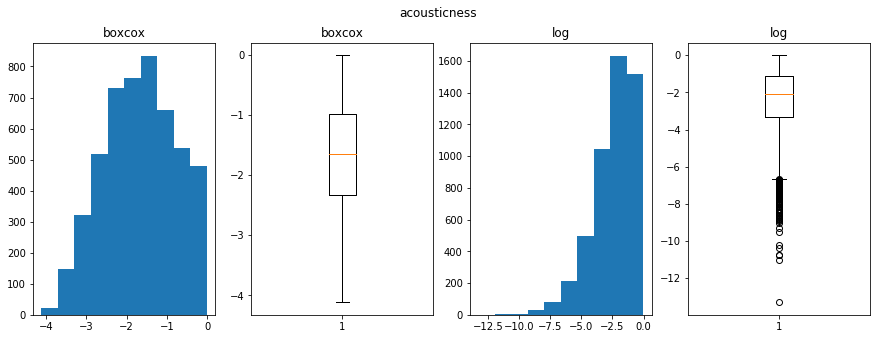

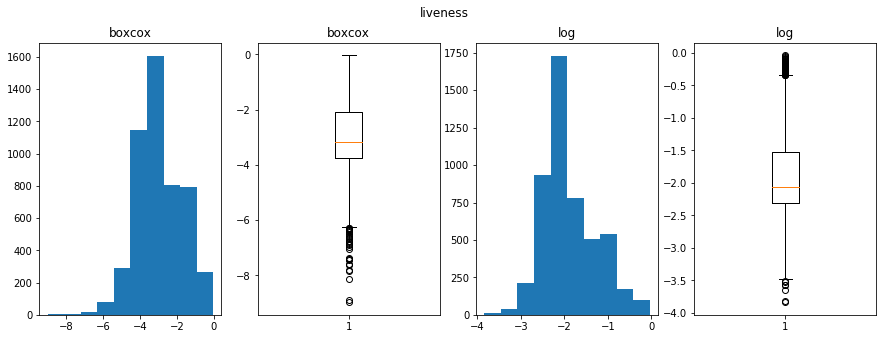

In [20]:
#try boxcox transforming skewed variables so values more evenly dispersed for clustering
for c in ['speechiness', 'acousticness', 'liveness']:
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15, 5))
    bx = boxcox(unique_df[c])[0]
    lg = np.log(unique_df[c])
    ax1.hist(bx)
    ax2.boxplot(bx)
    ax1.set_title("boxcox")
    ax2.set_title("boxcox")
    
    
    ax3.hist(lg)
    ax4.boxplot(lg)
    ax3.set_title("log")
    ax4.set_title("log")
    
    fig.suptitle(c)
    plt.show()

In [21]:
#boxcox transform speechiness and acousticness, log transform liveness
bx_sp = boxcox(unique_df.speechiness)[0]
bx_ac = boxcox(unique_df.acousticness)[0]
lg_lv = np.log(unique_df.liveness)

unique_df.loc[:,'bx_speechiness'] = bx_sp
unique_df.loc[:,'bx_acousticness'] = bx_ac
unique_df.loc[:,'lg_liveness'] = lg_lv
unique_df.head()

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,...,acousticness,liveness,valence,tempo,uri,duration_ms,time_signature,bx_speechiness,bx_acousticness,lg_liveness
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),"1,371,493",0.927,0.665,11.0,-5.313,1.0,...,0.061,0.123,0.175,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0,-1.573269,-2.058362,-2.095571
1,2,2017-01-01,Drake,Fake Love,"1,180,074",0.928,0.481,9.0,-9.350,0.0,...,0.105,0.176,0.613,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0,-1.374591,-1.755650,-1.737271
2,3,2017-01-01,The Weeknd,Starboy,"1,064,351",0.679,0.587,7.0,-7.015,1.0,...,0.141,0.137,0.486,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0,-1.421981,-1.574665,-1.987774
3,4,2017-01-01,The Chainsmokers,Closer,"1,010,492",0.748,0.524,8.0,-5.599,1.0,...,0.414,0.111,0.661,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0,-4.430726,-0.797622,-2.198225
4,5,2017-01-01,Rae Sremmurd,Black Beatles,"874,289",0.794,0.632,0.0,-6.163,1.0,...,0.142,0.128,0.355,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0,-3.391260,-1.570173,-2.055725


In [22]:
cluster_cols = [c for c in cluster_cols if c not in {"speechiness", "acousticness", "liveness"}] + ['bx_speechiness', 'bx_acousticness', 'lg_liveness']
cluster_cols

['danceability',
 'energy',
 'loudness',
 'valence',
 'tempo',
 'bx_speechiness',
 'bx_acousticness',
 'lg_liveness']

In [23]:
X = unique_df[cluster_cols]

In [24]:
X

,danceability,energy,loudness,valence,tempo,bx_speechiness,bx_acousticness,lg_liveness
0,0.927,0.665,-5.313,0.175,127.076,-1.573269,-2.058362,-2.095571
1,0.928,0.481,-9.350,0.613,134.007,-1.374591,-1.755650,-1.737271
2,0.679,0.587,-7.015,0.486,186.003,-1.421981,-1.574665,-1.987774
3,0.748,0.524,-5.599,0.661,95.010,-4.430726,-0.797622,-2.198225
4,0.794,0.632,-6.163,0.355,145.926,-3.391260,-1.570173,-2.055725
...,...,...,...,...,...,...,...,...
5008,0.439,0.323,-6.764,0.358,116.743,-4.506961,-0.150466,-1.924149
5009,0.611,0.667,-7.801,0.793,119.996,-4.411053,-2.625493,-1.422958
5010,0.579,0.714,-4.455,0.300,109.974,-4.386831,-3.231057,-2.198225
5011,0.692,0.782,-7.316,0.767,94.535,-1.329249,-1.513875,-2.017406


In [25]:
def scale(X):
    X_scaled = X.copy()    
    scaled_values = RobustScaler().fit_transform(X)
    
    for i in range(scaled_values.shape[1]):
        X_scaled.iloc[:,i] = scaled_values[:,i]

    return X_scaled

In [28]:
X_scaled = scale(X)
X_scaled

,danceability,energy,loudness,valence,tempo,bx_speechiness,bx_acousticness,lg_liveness
0,1.123223,0.147826,0.344008,-0.811940,0.107023,0.572576,-0.304143,-0.040773
1,1.127962,-0.652174,-1.046143,0.495522,0.254847,0.661046,-0.078628,0.415717
2,-0.052133,-0.191304,-0.242080,0.116418,1.363811,0.639944,0.056203,0.096565
3,0.274882,-0.465217,0.245523,0.638806,-0.576876,-0.699823,0.635086,-0.171559
4,0.492891,0.004348,0.051309,-0.274627,0.509054,-0.236958,0.059549,0.009993
...,...,...,...,...,...,...,...,...
5008,-1.189573,-1.339130,-0.155647,-0.265672,-0.113358,-0.733770,1.117206,0.177627
5009,-0.374408,0.156522,-0.512741,1.032836,-0.043978,-0.691063,-0.726646,0.816165
5010,-0.526066,0.360870,0.639463,-0.438806,-0.257726,-0.680277,-1.177780,-0.171559
5011,0.009479,0.656522,-0.345730,0.955224,-0.587007,0.681236,0.101490,0.058812


In [29]:
def apply_pca(X, n):
    pca = PCA(n_components=n)
    pc_cols = pd.DataFrame(pca.fit_transform(X), columns = [f"pc{i+1}" for i in range(n)])
    X_pca = pd.concat([X, pc_cols], axis = 1)        
    return X_pca
    

In [31]:
X_pca = apply_pca(X_scaled, 2)

## Clustering

In [32]:
from sklearn.cluster import KMeans

In [40]:
def plot_kmeans(X, cols, min_clusters, max_clusters):

    df = X.loc[:,cols]
    
    ins = []
    for c in range(min_clusters, max_clusters+1):
        km = KMeans(n_clusters = c)
        km.fit(df)
        ins.append(km.inertia_)    
    
    plt.plot(range(1,len(ins)+1), ins, marker = "x")
    plt.xlabel('clusters')
    plt.ylabel("inertia")
    plt.xticks(range(1,len(ins)+1))
    plt.show()
    
    return ins

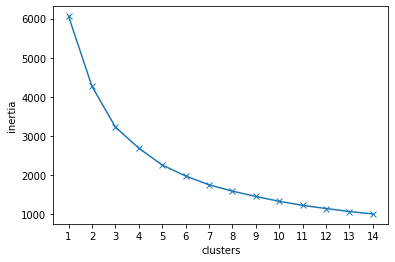

[6060.471254110499,
 4267.746560861651,
 3224.271759096367,
 2682.5952586157896,
 2250.92888143611,
 1970.8873926305866,
 1743.7770355161301,
 1583.0177484437368,
 1446.6673612872282,
 1321.357344989398,
 1218.1469183737227,
 1137.8356382333584,
 1059.9265710651753,
 999.3376492861653]

In [41]:
plot_kmeans(X_pca, ['pc1', 'pc2'], 2, 15)

In [39]:
k = 7

In [44]:
def apply_kmeans(X, k, cols):
    X_cluster = X.copy()
    cl_df = X.loc[:,cols]
    
    km = KMeans(n_clusters = k).fit(cl_df)
    X_cluster["cluster"] = km.labels_

    return X_cluster

In [46]:
X_cluster = apply_kmeans(X_pca, k, ['pc1', 'pc2'])

In [47]:
X_cluster

,danceability,energy,loudness,valence,tempo,bx_speechiness,bx_acousticness,lg_liveness,pc1,pc2,cluster
0,1.123223,0.147826,0.344008,-0.811940,0.107023,0.572576,-0.304143,-0.040773,-0.584825,-0.756712,4
1,1.127962,-0.652174,-1.046143,0.495522,0.254847,0.661046,-0.078628,0.415717,0.586891,-0.765480,5
2,-0.052133,-0.191304,-0.242080,0.116418,1.363811,0.639944,0.056203,0.096565,-0.005699,-0.236082,1
3,0.274882,-0.465217,0.245523,0.638806,-0.576876,-0.699823,0.635086,-0.171559,0.069753,-0.534572,5
4,0.492891,0.004348,0.051309,-0.274627,0.509054,-0.236958,0.059549,0.009993,-0.196790,-0.388973,1
...,...,...,...,...,...,...,...,...,...,...,...
5008,-1.189573,-1.339130,-0.155647,-0.265672,-0.113358,-0.733770,1.117206,0.177627,1.348514,0.610246,3
5009,-0.374408,0.156522,-0.512741,1.032836,-0.043978,-0.691063,-0.726646,0.816165,-0.257641,0.573343,1
5010,-0.526066,0.360870,0.639463,-0.438806,-0.257726,-0.680277,-1.177780,-0.171559,-0.899856,0.184547,4
5011,0.009479,0.656522,-0.345730,0.955224,-0.587007,0.681236,0.101490,0.058812,-0.411628,-0.286164,1


In [55]:
ucl_df = pd.concat([unique_df, X_cluster.loc[:,['pc1', 'pc2', 'cluster']]], axis = 1)

In [66]:
ucl_df.loc[ucl_df.cluster == 4, :]

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,...,tempo,uri,duration_ms,time_signature,bx_speechiness,bx_acousticness,lg_liveness,pc1,pc2,cluster
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),"1,371,493",0.927,0.665,11.0,-5.313,1.0,...,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0,-1.573269,-2.058362,-2.095571,-0.584825,-0.756712,4
11,12,2017-01-01,Bruno Mars,24K Magic,"574,974",0.818,0.803,1.0,-4.282,1.0,...,106.970,spotify:track:6b8Be6ljOzmkOmFslEb23P,225983.0,4.0,-3.084732,-2.344295,-1.877317,-1.399803,-0.317704,4
18,19,2017-01-01,Young M.A,OOOUUU,"456,308",0.635,0.847,7.0,-3.152,1.0,...,166.072,spotify:track:7JYsArznYOjX2jsrT3UEnL,234650.0,4.0,-0.856559,-0.585513,-1.870803,-1.364999,0.114240,4
20,21,2017-01-01,Chance the Rapper,No Problem (feat. Lil Wayne & 2 Chainz),"449,345",0.652,0.795,11.0,-5.192,0.0,...,135.018,spotify:track:0v9Wz8o0BT8DU38R4ddjeH,304607.0,4.0,-2.003216,-1.509697,-2.095571,-0.998833,-0.242567,4
22,23,2017-01-01,Hailee Steinfeld,Starving,"446,785",0.729,0.615,4.0,-4.238,1.0,...,99.989,spotify:track:4Ce37cRWvM1vIGGynKcs22,181880.0,4.0,-3.395939,-0.871004,-2.253795,-0.417150,-0.457703,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,185,2020-04-03,Marshmello,Been Thru This Before (with Giggs & SAINt JHN),"232,497",0.878,0.715,10.0,-2.069,0.0,...,130.013,spotify:track:356X9AHexTmUwTAz61nV0p,207140.0,4.0,-4.411053,-1.505540,-2.273026,-1.686903,-0.959900,4
4994,57,2020-04-10,The Strokes,Brooklyn Bridge To Chorus,"370,338",0.628,0.571,0.0,-3.897,1.0,...,119.894,spotify:track:2mDYYGaGd9uXKkK2YhDA3i,235947.0,4.0,-3.433981,-2.995763,-2.485307,-0.793998,-0.453201,4
4995,61,2020-04-10,Polo G,DND,"366,227",0.778,0.786,0.0,-4.610,0.0,...,159.954,spotify:track:7sMu0DXeCVYwTivw9kBl99,180058.0,4.0,-1.111783,-1.630580,-2.137071,-0.950794,-0.399279,4
5005,145,2020-04-10,The Strokes,Eternal Summer,"245,827",0.620,0.780,7.0,-4.466,0.0,...,93.954,spotify:track:6IRzBP4gVoV4D2zHmocoWy,375320.0,4.0,-4.307391,-2.705381,-2.485307,-0.928846,-0.177530,4


In [82]:
def plot_clusters(df_labeled, k):
    for i in range(k):
        pts = df_labeled.loc[df_labeled.cluster == i, :]
        plt.scatter(pts["pc1"], pts["pc2"], label = i)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title = 'cluster')
    plt.show()

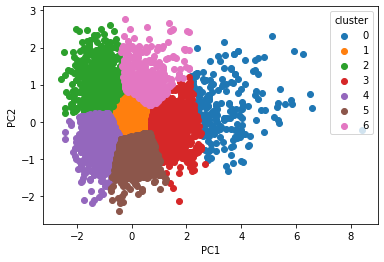

In [83]:
plot_clusters(ucl_df, k)

In [85]:
ucl_df.to_csv("TopCharts_clustered_songs.csv", index = False)